In [49]:
# for data wrangling
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# for basemaps 
import contextily as ctx

# to for advanced plotting
import matplotlib.pyplot as plt

import plotly.express as px

In [11]:
countrace2019gdf = gpd.read_file('blockcountrace2019gdf.geojson')
pd.set_option('display.max_columns', None)
countrace2019gdf.sample(3)

,geoid,name,Total,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some other race alone,Two or more races,Hispanic or Latino,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races,Percent Hispanic or Latino,geoid10,newgeoid,counts,geometry
3,15000US060014003001,"Block Group 1, Alameda, CA",1134.0,735.0,0.0,0.0,274.0,0.0,0.0,50.0,75.0,64.814815,0.000000,0.00000,24.162257,0.0,0.0,4.409171,6.613757,060014003001,60014003001,30,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
1,15000US060014002001,"Block Group 1, Alameda, CA",990.0,761.0,13.0,4.0,41.0,0.0,0.0,75.0,96.0,76.868687,1.313131,0.40404,4.141414,0.0,0.0,7.575758,9.696970,060014002001,60014002001,1,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
266,15000US060014087001,"Block Group 1, Alameda, CA",850.0,115.0,499.0,0.0,81.0,0.0,0.0,18.0,137.0,13.529412,58.705882,0.00000,9.529412,0.0,0.0,2.117647,16.117647,060014087001,60014087001,18,"MULTIPOLYGON (((-122.19034 37.77158, -122.1902..."


In [19]:
columns_to_keep = ['Total',
 'Percent White alone',
 'Percent Black or African American alone',
 'Percent American Indian and Alaska Native alone',
 'Percent Asian alone',
 'Percent Native Hawaiian and Other Pacific Islander alone',
 'Percent Some other race alone',
 'Percent Two or more races',
 'Percent Hispanic or Latino',
 'newgeoid',
 'counts',
 'geometry']

In [20]:
newcountrace2019gdf = countrace2019gdf[columns_to_keep]
newcountrace2019gdf

,Total,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races,Percent Hispanic or Latino,newgeoid,counts,geometry
0,3120.0,74.262821,3.429487,0.000000,12.532051,0.000000,0.000000,5.993590,3.782051,60014001001,75,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
1,990.0,76.868687,1.313131,0.404040,4.141414,0.000000,0.000000,7.575758,9.696970,60014002001,1,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542..."
2,1017.0,70.206490,3.834808,0.000000,12.782694,0.000000,0.000000,5.506391,7.669617,60014002002,12,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,1134.0,64.814815,0.000000,0.000000,24.162257,0.000000,0.000000,4.409171,6.613757,60014003001,30,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517..."
4,1237.0,81.487470,1.455133,0.000000,9.135004,0.000000,0.000000,0.000000,7.922393,60014003002,15,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622..."
...,...,...,...,...,...,...,...,...,...,...,...,...
320,1290.0,1.705426,31.627907,0.697674,5.348837,0.000000,0.000000,2.015504,58.604651,60014104001,7,"MULTIPOLYGON (((-122.16321 37.74434, -122.1629..."
321,1400.0,2.428571,49.714286,0.214286,6.928571,0.000000,0.000000,0.714286,40.000000,60014104002,6,"MULTIPOLYGON (((-122.16273 37.74065, -122.1625..."
322,1787.0,12.870733,22.439843,0.000000,16.004477,0.000000,0.000000,2.797985,45.886961,60014104003,9,"MULTIPOLYGON (((-122.16921 37.74276, -122.1691..."
323,2705.0,14.898336,61.072089,0.258780,10.868762,0.887246,0.258780,1.922366,9.833641,60014105001,35,"MULTIPOLYGON (((-122.29360 37.80530, -122.2935..."


In [29]:
newcountrace2019gdf['CountPer1000'] = (newcountrace2019gdf['counts']*1000)/newcountrace2019gdf['Total']

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [35]:
newcountrace2019gdf.drop(columns='CountPerCapita')

,Total,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races,Percent Hispanic or Latino,newgeoid,counts,geometry,CountPer1000
0,3120.0,74.262821,3.429487,0.000000,12.532051,0.000000,0.000000,5.993590,3.782051,60014001001,75,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466...",24.038462
1,990.0,76.868687,1.313131,0.404040,4.141414,0.000000,0.000000,7.575758,9.696970,60014002001,1,"MULTIPOLYGON (((-122.25508 37.84607, -122.2542...",1.010101
2,1017.0,70.206490,3.834808,0.000000,12.782694,0.000000,0.000000,5.506391,7.669617,60014002002,12,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577...",11.799410
3,1134.0,64.814815,0.000000,0.000000,24.162257,0.000000,0.000000,4.409171,6.613757,60014003001,30,"MULTIPOLYGON (((-122.25186 37.84475, -122.2517...",26.455026
4,1237.0,81.487470,1.455133,0.000000,9.135004,0.000000,0.000000,0.000000,7.922393,60014003002,15,"MULTIPOLYGON (((-122.26230 37.83786, -122.2622...",12.126112
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,1290.0,1.705426,31.627907,0.697674,5.348837,0.000000,0.000000,2.015504,58.604651,60014104001,7,"MULTIPOLYGON (((-122.16321 37.74434, -122.1629...",5.426357
321,1400.0,2.428571,49.714286,0.214286,6.928571,0.000000,0.000000,0.714286,40.000000,60014104002,6,"MULTIPOLYGON (((-122.16273 37.74065, -122.1625...",4.285714
322,1787.0,12.870733,22.439843,0.000000,16.004477,0.000000,0.000000,2.797985,45.886961,60014104003,9,"MULTIPOLYGON (((-122.16921 37.74276, -122.1691...",5.036374
323,2705.0,14.898336,61.072089,0.258780,10.868762,0.887246,0.258780,1.922366,9.833641,60014105001,35,"MULTIPOLYGON (((-122.29360 37.80530, -122.2935...",12.939002


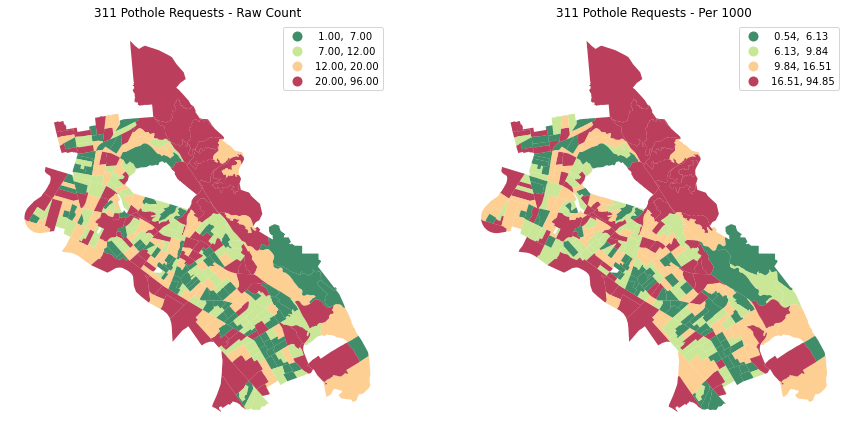

In [33]:
# Let's see how this map compares to just a map of 311 counts, without spatial weighting. 
fig, ax = plt.subplots(1, 2, figsize=(15, 10))

# two subplots produces ax[0] (left) and ax[1] (right)

# regular count map on the left
newcountrace2019gdf.plot(ax=ax[0], # this assigns the map to the left subplot
         column='counts', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=4, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75, 
        legend=True)


ax[0].axis("off")
ax[0].set_title("311 Pothole Requests - Raw Count")

# spatial lag map on the right
newcountrace2019gdf.plot(ax=ax[1], # this assigns the map to the right subplot
         column='CountPer1000', 
         cmap='RdYlGn_r', 
         scheme='quantiles',
         k=4, 
         edgecolor='white', 
         linewidth=0, 
         alpha=0.75,
         legend=True)

ax[1].axis("off")
ax[1].set_title("311 Pothole Requests - Per 1000")

plt.show()

In [41]:
mapcountrace2019gdf = newcountrace2019gdf.to_crs(epsg=3857)

In [45]:
countsort2019gdf = mapcountrace2019gdf.sort_values(by='counts',ascending = False)
countsort2019gdf.head(10)

,Total,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races,Percent Hispanic or Latino,newgeoid,counts,geometry,CountPerCapita,CountPer1000
108,1780.0,83.314607,1.910112,0.000000,10.280899,0.000000,0.000000,0.898876,3.595506,60014045024,96,"MULTIPOLYGON (((-13604998.508 4555615.858, -13...",53.932584,53.932584
0,3120.0,74.262821,3.429487,0.000000,12.532051,0.000000,0.000000,5.993590,3.782051,60014001001,75,"MULTIPOLYGON (((-13608464.885 4563254.661, -13...",24.038462,24.038462
218,1123.0,20.926091,10.774711,0.267142,2.315227,1.068566,0.000000,4.541407,60.106857,60014073002,71,"MULTIPOLYGON (((-13606014.076 4546219.642, -13...",63.223508,63.223508
164,1180.0,5.423729,3.305085,0.000000,10.254237,0.000000,0.000000,0.000000,81.016949,60014061001,63,"MULTIPOLYGON (((-13606963.408 4547686.339, -13...",53.389831,53.389831
103,2046.0,69.794721,0.733138,0.879765,9.677419,0.000000,0.000000,14.125122,4.789834,60014044003,62,"MULTIPOLYGON (((-13604962.663 4557043.565, -13...",30.303030,30.303030
112,1421.0,80.717804,4.996481,0.000000,6.896552,0.000000,0.985222,1.055595,5.348346,60014046004,61,"MULTIPOLYGON (((-13604228.288 4554660.169, -13...",42.927516,42.927516
161,863.0,38.818076,7.879490,0.000000,21.205098,0.347625,0.000000,2.896871,28.852839,60014060001,61,"MULTIPOLYGON (((-13610739.699 4549621.598, -13...",70.683662,70.683662
188,1110.0,17.207207,14.774775,0.450450,35.855856,0.450450,0.000000,4.414414,26.846847,60014066021,54,"MULTIPOLYGON (((-13605234.839 4550633.174, -13...",48.648649,48.648649
101,2373.0,66.371681,4.888327,0.000000,13.569322,0.000000,0.000000,7.627476,7.543194,60014044001,54,"MULTIPOLYGON (((-13607035.988 4558612.451, -13...",22.756005,22.756005
279,2197.0,1.957214,31.816113,0.000000,2.958580,0.273100,0.000000,1.593081,61.401912,60014090003,53,"MULTIPOLYGON (((-13603426.565 4540923.647, -13...",24.123805,24.123805


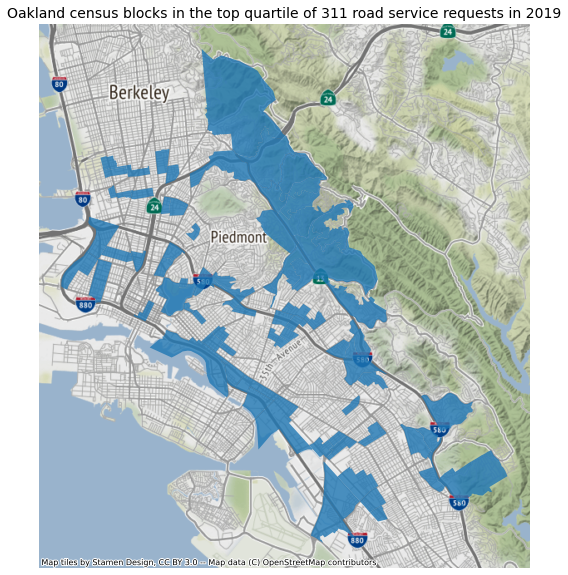

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))

countsort2019gdf[countsort2019gdf['counts'] > 20].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks in the top quartile of 311 road service requests in 2019',fontsize=14)

# add a basemap
ctx.add_basemap(ax)

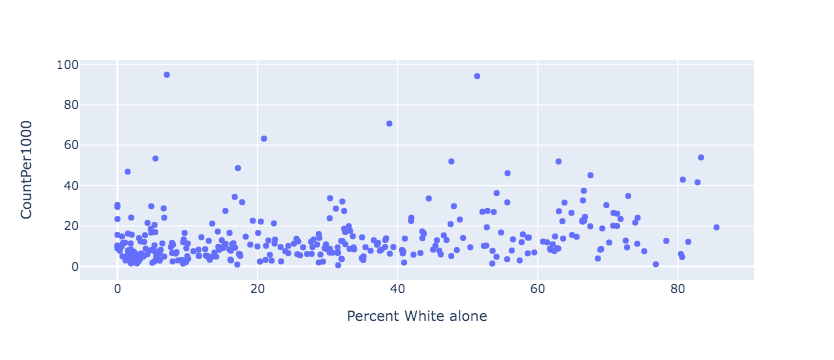

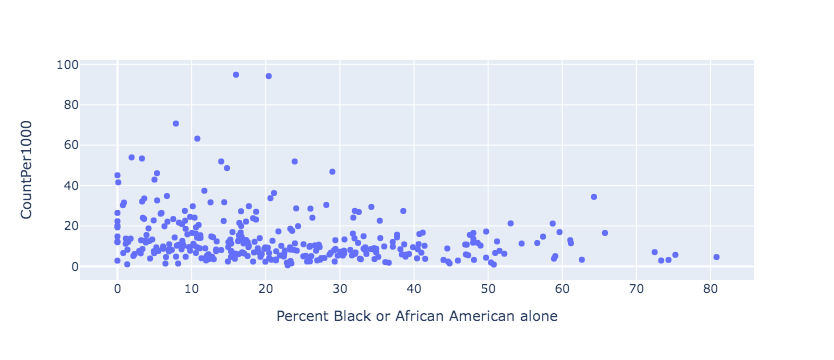

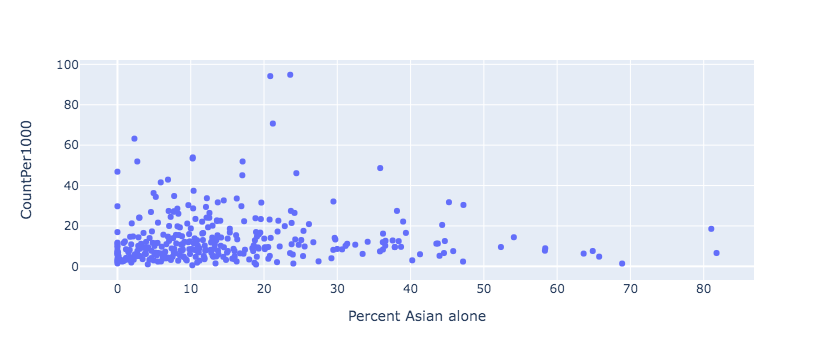

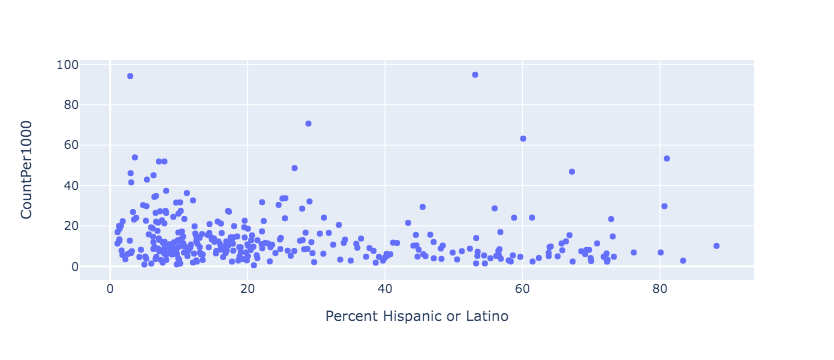

In [73]:
race_list = ['Percent White alone', 'Percent Black or African American alone','Percent Asian alone','Percent Hispanic or Latino']

# Function
def racecharts(race):
    fig = px.scatter(countsort2019gdf, x=race, y='CountPer1000')
    fig.show()
    

# call the function with a loop
for race in race_list:
    racecharts(race)
    

In [47]:
countpersort2019gdf = mapcountrace2019gdf.sort_values(by='CountPer1000',ascending = False)
countpersort2019gdf.head(10)

,Total,Percent White alone,Percent Black or African American alone,Percent American Indian and Alaska Native alone,Percent Asian alone,Percent Native Hawaiian and Other Pacific Islander alone,Percent Some other race alone,Percent Two or more races,Percent Hispanic or Latino,newgeoid,counts,geometry,CountPerCapita,CountPer1000
165,369.0,7.046070,15.989160,0.000000,23.577236,0.000000,0.0,0.271003,53.116531,60014061002,35,"MULTIPOLYGON (((-13606604.180 4546841.221, -13...",94.850949,94.850949
29,446.0,51.345291,20.403587,0.000000,20.852018,2.690583,0.0,1.793722,2.914798,60014011001,42,"MULTIPOLYGON (((-13610350.749 4555678.437, -13...",94.170404,94.170404
161,863.0,38.818076,7.879490,0.000000,21.205098,0.347625,0.0,2.896871,28.852839,60014060001,61,"MULTIPOLYGON (((-13610739.699 4549621.598, -13...",70.683662,70.683662
218,1123.0,20.926091,10.774711,0.267142,2.315227,1.068566,0.0,4.541407,60.106857,60014073002,71,"MULTIPOLYGON (((-13606014.076 4546219.642, -13...",63.223508,63.223508
108,1780.0,83.314607,1.910112,0.000000,10.280899,0.000000,0.0,0.898876,3.595506,60014045024,96,"MULTIPOLYGON (((-13604998.508 4555615.858, -13...",53.932584,53.932584
164,1180.0,5.423729,3.305085,0.000000,10.254237,0.000000,0.0,0.000000,81.016949,60014061001,63,"MULTIPOLYGON (((-13606963.408 4547686.339, -13...",53.389831,53.389831
306,443.0,62.979684,13.995485,0.000000,2.708804,0.000000,0.0,12.415350,7.900677,60014099001,23,"MULTIPOLYGON (((-13598365.647 4547277.925, -13...",51.918736,51.918736
84,732.0,47.677596,23.907104,0.000000,17.076503,0.546448,0.0,3.688525,7.103825,60014038003,38,"MULTIPOLYGON (((-13608646.336 4552702.415, -13...",51.912568,51.912568
188,1110.0,17.207207,14.774775,0.450450,35.855856,0.450450,0.0,4.414414,26.846847,60014066021,54,"MULTIPOLYGON (((-13605234.839 4550633.174, -13...",48.648649,48.648649
259,683.0,1.464129,28.989751,0.000000,0.000000,2.342606,0.0,0.000000,67.203514,60014085003,32,"MULTIPOLYGON (((-13601287.673 4545163.860, -13...",46.852123,46.852123


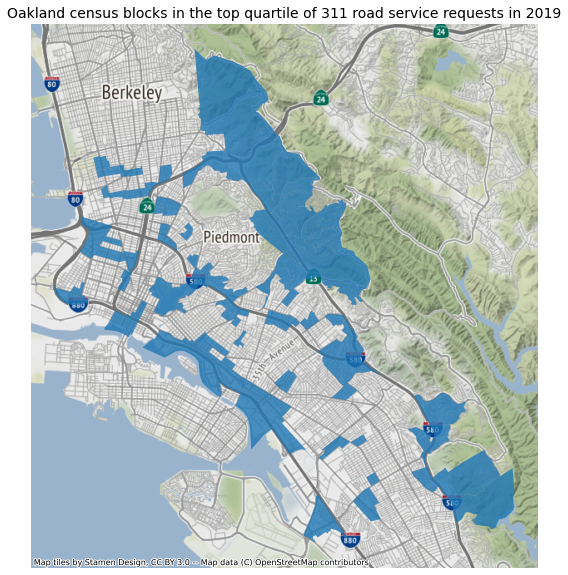

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))

countsort2019gdf[countsort2019gdf['CountPer1000'] > 16].plot(ax=ax, alpha=0.8)


ax.axis('off')


ax.set_title('Oakland census blocks in the top quartile of 311 road service requests in 2019',fontsize=14)

# add a basemap
ctx.add_basemap(ax)